In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
raw_data = pd.read_csv('static/chip_dataset.csv')
raw_data

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [23]:
raw_data.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [41]:
clean_data = raw_data.assign(dict={'Release Date': pd.to_datetime(raw_data['Release Date'])})
clean_data

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,dict
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0,NaN
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN,NaN


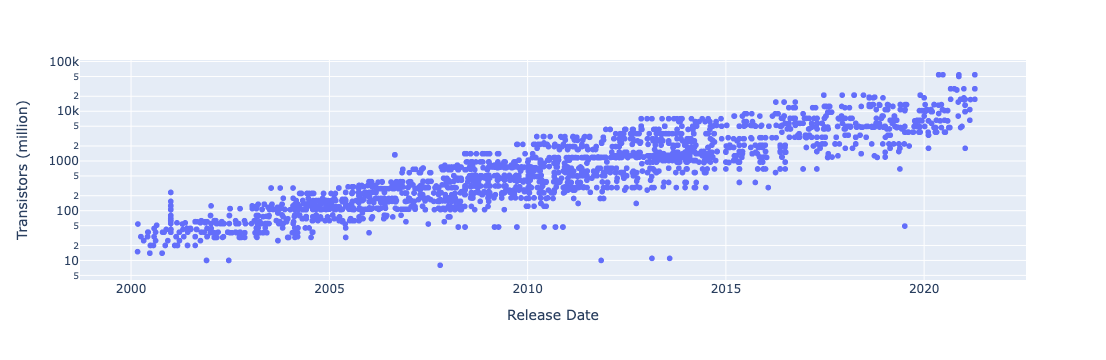

In [46]:
fig = px.scatter(clean_data, x='Release Date', y='Transistors (million)', log_y=True)
fig

In [50]:
idxmax_per_year = (raw_data
 .assign(Year = pd.to_datetime(raw_data['Release Date']).dt.year)
).groupby('Year')['Transistors (million)'].idxmax()
max_per_year = raw_data.loc[idxmax_per_year].sort_values('Release Date')
max_per_year

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
3074,3074,Sony Playstation 2 GPU 250nm,GPU,2000-03-04,250.0,79.0,279.0,54.0,147.0,Sony,Other,NaN,NaN,NaN
1262,1262,AMD Athlon 64 3700+,CPU,2001-01-01,90.0,89.0,199.0,233.0,2200.0,Unknown,AMD,NaN,NaN,NaN
226,226,Intel Pentium 4 2.0,CPU,2002-01-07,130.0,92.0,146.0,125.0,2000.0,Intel,Intel,NaN,NaN,NaN
50,50,Intel Xeon 3.20,CPU,2003-10-06,130.0,97.0,237.0,286.0,3200.0,Intel,Intel,NaN,NaN,NaN
1613,1613,Intel Xeon 3.20,CPU,2004-02-01,130.0,97.0,237.0,286.0,3200.0,Intel,Intel,NaN,NaN,NaN
2361,2361,ATI Radeon X1800 CrossFire Edition,GPU,2005-12-20,90.0,113.0,288.0,321.0,600.0,TSMC,ATI,NaN,NaN,NaN
388,388,Intel Xeon 7130M,CPU,2006-08-27,65.0,150.0,435.0,1328.0,3200.0,Intel,Intel,NaN,NaN,NaN
1705,1705,Intel Core 2 Extreme QX9650,CPU,2007-11-30,45.0,130.0,107.0,820.0,3000.0,Intel,Intel,NaN,NaN,NaN
2437,2437,NVIDIA GeForce GTX 260 Rev. 2,GPU,2008-07-23,55.0,182.0,470.0,1400.0,576.0,TSMC,NVIDIA,NaN,476.9,59.62
2652,2652,ATI Radeon HD 5970,GPU,2009-11-18,40.0,294.0,334.0,2154.0,725.0,TSMC,ATI,NaN,2320.0,464.00


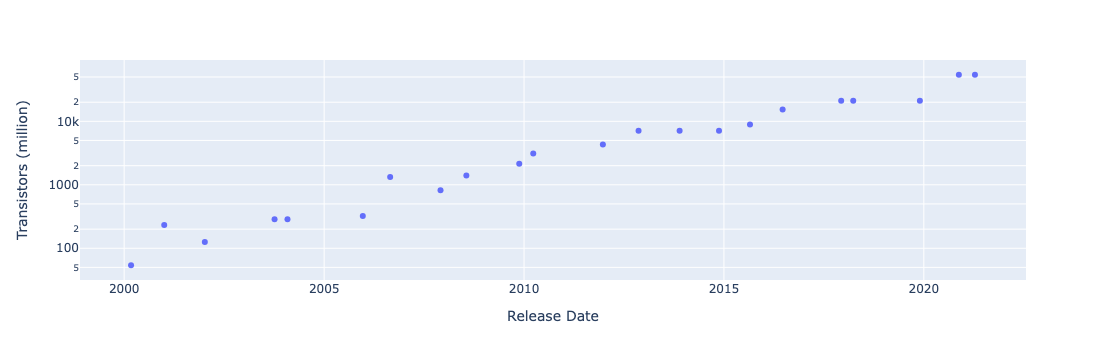

In [51]:
fig = px.scatter(max_per_year, x='Release Date', y='Transistors (million)', log_y=True)
fig